In [1]:
import numpy as np
import pandas as pd

In [19]:
df=pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [4]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [5]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
X=df.iloc[:,0:-1].values
Y=df.iloc[:,-1].values

In [7]:
Y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [8]:
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
X=scaler.fit_transform(X)

In [11]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state=0)

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [129]:
model=Sequential()

In [16]:
X_train.shape
#these 7 columns will be the input layer of this nn

(360, 7)

In [130]:
model.add(Dense(7,activation='relu',input_dim=X_train.shape[1])) #for hidden layer...3 perceptrons
model.add(Dense(3,activation='relu'))
# model.add(Dense(1,activation='relu'))
model.add(Dense(1,activation='linear')) #for o/p layer

#Dense: Dense(3, activation='relu', input_dim=X_train.shape[1]): This creates a dense (fully connected) layer with 3 neurons (perceptrons).
#activation='relu': activation='relu': The activation function used is ReLU (Rectified Linear Unit), which introduces non-linearity to the model. ReLU outputs the input directly if it is positive; otherwise, it outputs zero.
#input_dim=X_train.shape[1]: This specifies the input dimension to the layer, which is the number of features in the training data X_train.
#Dense(3, activation='linear'): This creates another dense layer with 3 neurons.


F:\okok\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [131]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

In [133]:
model.compile(optimizer="Adam",loss='mean_squared_error')
#optimizer="Adam": This specifies the optimizer to use for training the model. Adam (short for Adaptive Moment Estimation) is a popular optimization algorithm that combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. It is efficient and works well with large datasets and high-dimensional parameter spaces.
# Optimizer: Adam helps in adjusting the weights of the network to minimize the loss function.

In [134]:
history=model.fit(X_train,Y_train,epochs=100,batch_size=10,verbose=1,validation_split=0.2)
# validation split is the technique where the train data is also further more splitted into train and test data
history

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.8526 - val_loss: 2.0227
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6969 - val_loss: 1.2463
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0703 - val_loss: 0.8406
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7308 - val_loss: 0.6212
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6166 - val_loss: 0.4885
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4771 - val_loss: 0.4012
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4149 - val_loss: 0.3351
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2997 - val_loss: 0.2817
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2567 - val_loss: 0.2357
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2175 - val_loss: 0.1957
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2011 - val_loss: 0.1621
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 70/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - val_loss: 0.0113
Epoch 71/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - val_loss: 0.0112
Epoch 72/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - val_loss: 0.0111
Epoch 73/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - val_loss: 0.0109
Epoch 74/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - val_loss: 0.0108
Epoch 75/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - val_loss: 0.0107
Epoch 76/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 77/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - val_loss: 0.0105
Epoch 78/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 79/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - val_loss: 0.0103
Epoch 80/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 

In [135]:
y_pred=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [136]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.7132774649909306

this gives the poorest result,hence we will now try to improve it

In [126]:
#model evaluation and improvements
# increase the no. of epochs
# increase nodes in the hidden layer
# add more layers

In [137]:
history.history
#.history in the syntax to get the dictionary of loss and validation value

{'loss': [2.597830295562744,
  1.5516432523727417,
  1.0164180994033813,
  0.727935791015625,
  0.5607693195343018,
  0.4458787739276886,
  0.36478811502456665,
  0.3024195432662964,
  0.25206565856933594,
  0.21082620322704315,
  0.17475451529026031,
  0.1441897749900818,
  0.11887718737125397,
  0.09843815118074417,
  0.08331535756587982,
  0.07224161177873611,
  0.06386806070804596,
  0.05765075236558914,
  0.05281596630811691,
  0.048696354031562805,
  0.04535333439707756,
  0.04217606782913208,
  0.03949384763836861,
  0.03722342848777771,
  0.03490491211414337,
  0.03289122134447098,
  0.03114173747599125,
  0.02950168587267399,
  0.02813916653394699,
  0.0268402099609375,
  0.025700148195028305,
  0.02466428652405739,
  0.023782966658473015,
  0.022937791422009468,
  0.02211097627878189,
  0.021348493173718452,
  0.020638776943087578,
  0.02001049742102623,
  0.01936138980090618,
  0.018851839005947113,
  0.01829857937991619,
  0.017738278955221176,
  0.017259107902646065,
  0.0

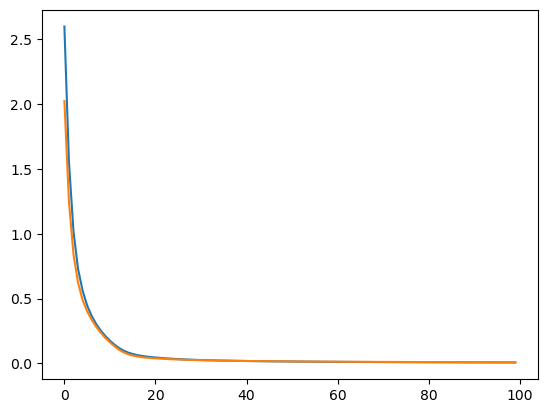

In [138]:
# plotting the above
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# xlabel=no. of epoches

# this helps in identify the overfitting due to loss or val_loss on the basis of epoches